<a href="https://colab.research.google.com/github/benassafma/441B-BenAssaf/blob/main/ECON_441B_HW10_Submission_(Mohanad_Ben_Assaf_505631393)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [15]:
print(X_scaled.shape)

(167, 9)


In [14]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_pca.shape)

(167, 2)


We can see that the shape of X has been reduced from (167,9) to (167,2) which means that we have reduced the number of features from 9 to 2 PCs. We can view the components below.

In [16]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

# 2.) Plot a Scatter plot of the PCs on the axis

Text(0, 0.5, 'pc2')

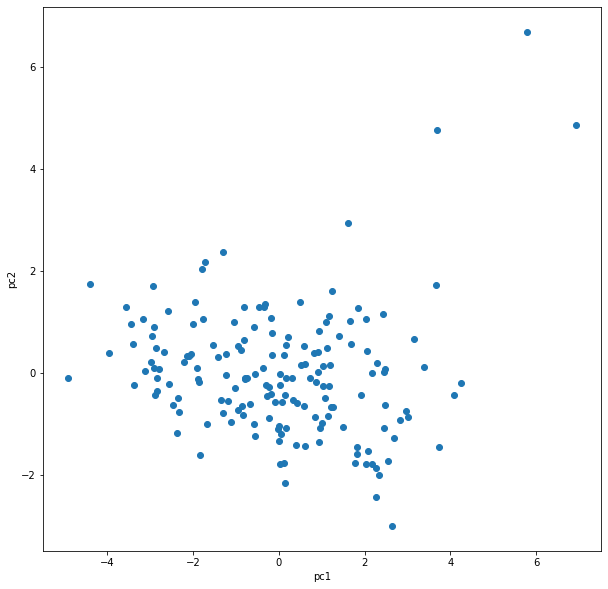

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel('pc1')
plt.ylabel('pc2')

# 3.) Rank the features in order of importance according to PCA

To determine the order of features importance, we will print out the principal components eigenvectors magnitudes and the higher the magnitude associated with a feature the more important it is.

In [25]:
loadings = pca.components_
print(abs(loadings))

[[0.41951945 0.28389698 0.15083782 0.16148244 0.39844111 0.19317293
  0.42583938 0.40372896 0.39264482]
 [0.19288394 0.61316349 0.24308678 0.67182064 0.02253553 0.00840447
  0.22270674 0.15523311 0.0460224 ]]


Now we can combine the two PCs and create a dataframe to host the results and sort it decending from the highest value (most important)

In [27]:
feature_names = df.columns[1:]
feature_importance = pd.DataFrame(np.sum(loadings**2, axis=0))
feature_importance.index = feature_names
feature_importance.sort_values(0,ascending=False)

,0
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


This shows that imports is the most important feature while inflation is the least important feature according to PCA.

# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

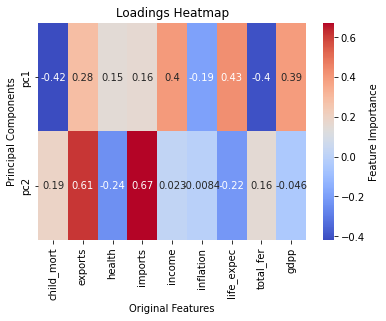

In [29]:
sns.heatmap(loadings, annot=True, cmap='coolwarm', cbar_kws={'label':'Feature Importance'}, xticklabels=feature_names, yticklabels=['pc1','pc2'])

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

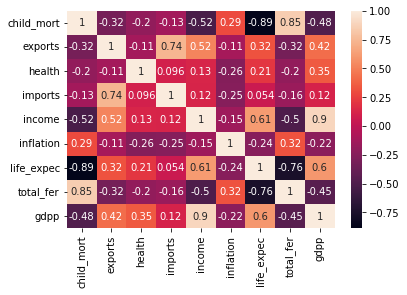

In [32]:
sns.heatmap(X.corr(), annot=True)
plt.plot()

We can notice that more correlated features are given more weight within the same PC, for example imports and exports are highly correlated and highly weighted in PC2 but not in PC1, while income and GDP are highly correlated and are assigned more weight in PC1 but not in PC2.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [34]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

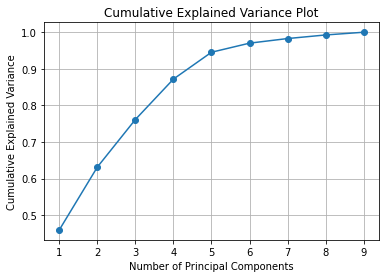

In [35]:
cumulative_explained_variance =  np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

looking at the plot, we can see that at 5 PCs we're retaining around 95% of the variance and hence 5 PCs should be used.